<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de Circuitos II

# Tarea semanal 2
#### Autor: Yañez $\lambda$, Joaquin

En este archivo se resolverá la tarea semanal enviada, la mayor parte del desarrollo esta realizada en hoja y se presentará en formato PDF, también se podrán encontrar las simulaciones necesarias, las respuestas a las preguntas teóricas y algunas aclaraciones necesarias.

El circuito a analizar era el siguiente:

<img src="./circuito.png" > 



## 1. Obtención de la transferencia

In [2]:
from IPython.display import IFrame
IFrame("./TS2.pdf", width=800, height=800)

## 2. Norma de frecuencia y sensibilidades
Para la norma de frecuencia se utilizó como parámetro $\frac{1}{R3}$ ya que tanto el factor de calidad, la pulsación angular y la ganancia del filtro dependen del valor de esta resistencia, y si ademas se normaliza en frecuencia y se define un Q específico como en este caso, todoslos componentes quedan con su valor definido. 

Por otro lado, se analizo la sensibilidad de $\omega_0$ con respecto a C, en este caso vemos que si el valor del capacitor se desvía, la frecuencia de corte **decrecerá** en igual medida. Por otro lado, el factor de calidad Q tiene la misma sensibilidad que la frecuencia con respecto a R2 y con respecto a R3, el factor de calidad **aumentará** en igual medida que la variación de esta resistencia.

Fe de errata: en el gráfico de la fase de la transferencia se ve como esta comienza en $\pi$ radianes pero si analizamos el mapa de polos y ceros vemos que en $\omega_0 = 0$ la suma de las fases de los polos da $0$ y luego esta decrece hasta $-\pi$ en infinito


## 3. Simulación de la transferencia normalizada en python

In [4]:
# Librerías externas NumPy, SciPy y Matplotlib
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot

(2, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>)

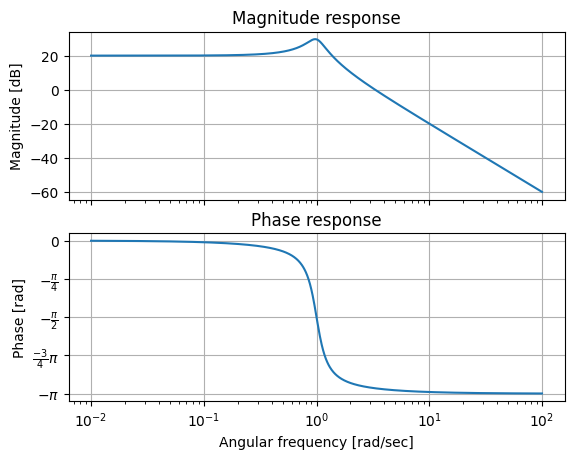

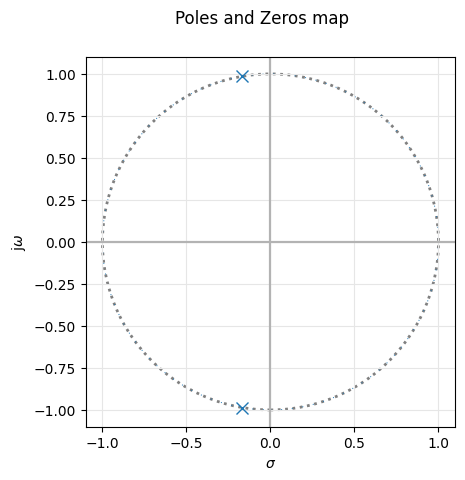

In [5]:
R1 = 1/10
R2 = 3
R3 = R4 = 1
C = 1

w0 = 1/(C*R3)
k = R3/R1
Q = R2*R3*C**2

my_tf = TransferFunction( [k], [1 , 1/Q , 1] )
bodePlot(my_tf, fig_id=1)
pzmap(my_tf, fig_id=2) #S plane pole/zero plot

## 4. Simulación de la transferencia sin normalizar
A continuación se simulará la transeferencia desnormalizando con los siguientes valores:
$\Omega_z = \frac{1}{R3} = 1000, \Omega_w = 1000 \frac{rad}{s}$

La simulación se realizará en Spice, como esta vez es desnormalizada el resultado debería dar con la misma forma pero con el máximo en el nuevo w0

## Simulación en LTSpice

A continuación se muestra el circuito simulado y su correspondiente resultado, cabe aclarar que como se realiza un análisis frecuencial y la entrada de tensión es una senoidal de amplitud 1 y fase 0, la salida V0 ya representa la transferencia del circuito.

<img src="./esquematicoTs2.png" /> 
<img src="./simulacionTs2.png" /> 

Se observa como la forma es la misma que se obtuvo antes en python, cabe aclarar que si bien se calculó un $\omega_0 = 1000$ como el eje de Spice esta en hertz la nueva frecuencia será $f_0 = \frac{\omega_0}{2\pi} \approx 160 Hz$